Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [7]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2d

   ----------------------- ---------------- 15.4/26.4 MB 6.5 MB/s eta 0:00:02
   ----------------------- ---------------- 15.8/26.4 MB 6.5 MB/s eta 0:00:02
   ------------------------ --------------- 16.1/26.4 MB 6.5 MB/s eta 0:00:02
   ------------------------ --------------- 16.4/26.4 MB 6.5 MB/s eta 0:00:02
   ------------------------- -------------- 16.7/26.4 MB 6.5 MB/s eta 0:00:02
   ------------------------- -------------- 17.0/26.4 MB 6.6 MB/s eta 0:00:02
   -------------------------- ------------- 17.3/26.4 MB 6.6 MB/s eta 0:00:02
   -------------------------- ------------- 17.6/26.4 MB 6.6 MB/s eta 0:00:02
   --------------------------- ------------ 18.0/26.4 MB 6.6 MB/s eta 0:00:02
   --------------------------- ------------ 18.3/26.4 MB 6.7 MB/s eta 0:00:02
   ---------------------------- ----------- 18.6/26.4 MB 6.7 MB/s eta 0:00:02
   ---------------------------- ----------- 19.1/26.4 MB 6.7 MB/s eta 0:00:02
   ----------------------------- ---------- 19.4/26.4 MB 6.7 MB/

In [65]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [66]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [67]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/smita/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/smita/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [68]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [69]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [70]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    seed=123,  # Setting the seed for reproducibility
    image_size=(img_height, img_width),  # Resizing images to the specified height and width
    batch_size=batch_size  # Using the defined batch size
)

# Verifying the structure of the dataset
for image_batch, labels_batch in train_ds.take(1):
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", labels_batch.shape)

Found 2239 files belonging to 9 classes.
Image batch shape:  (32, 180, 180, 3)
Label batch shape:  (32,)


In [71]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,  # Use the same directory or provide a validation directory if available
    validation_split=0.2,  # Assuming 20% of data will be used for validation
    subset="validation",  # Using the validation subset
    seed=123,  # Setting the seed for reproducibility
    image_size=(img_height, img_width),  # Resizing images to the specified height and width
    batch_size=batch_size  # Using the defined batch size
)

# Verifying the structure of the validation dataset
for image_batch, labels_batch in val_ds.take(1):
    print("Validation Image batch shape: ", image_batch.shape)
    print("Validation Label batch shape: ", labels_batch.shape)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Validation Image batch shape:  (32, 180, 180, 3)
Validation Label batch shape:  (32,)


In [72]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

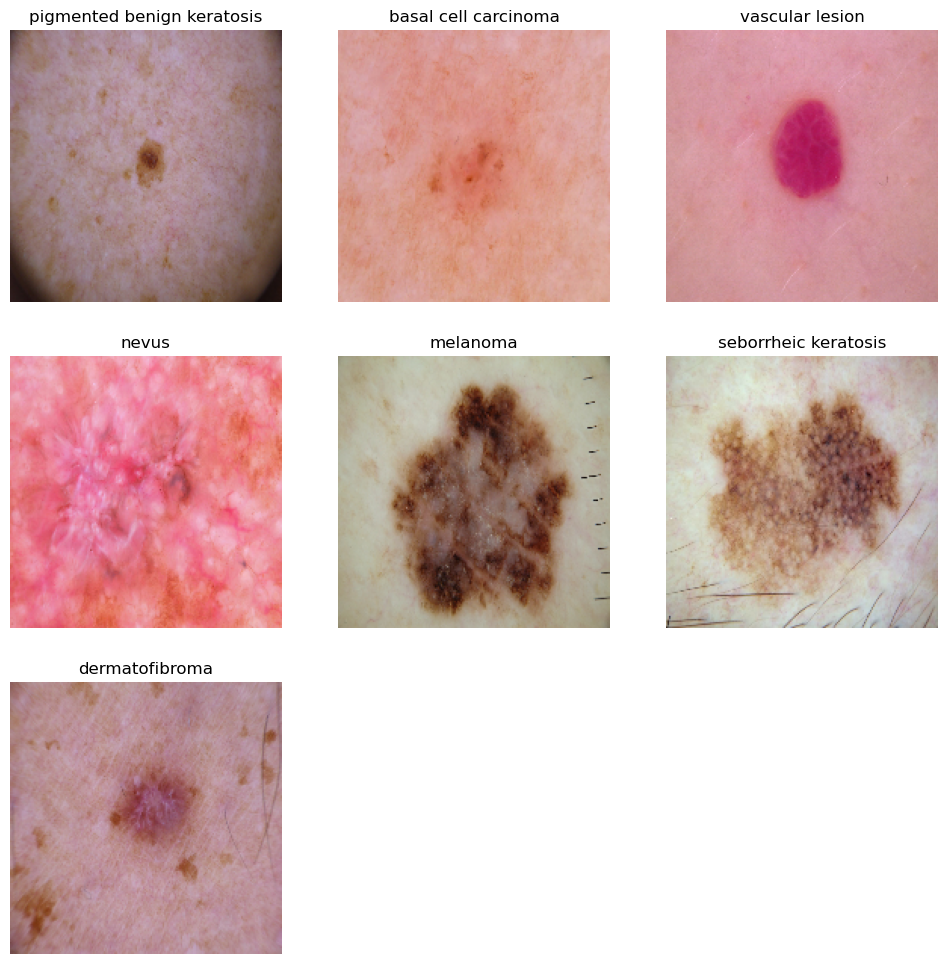

In [73]:
##import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

import matplotlib.pyplot as plt

# Create a figure to display one instance from each class
plt.figure(figsize=(12, 12))

# Dictionary to keep track of which classes have been displayed
displayed_classes = {class_name: False for class_name in class_names}

# Loop through the dataset and display one image for each class
for images, labels in train_ds.take(1):  # Take one batch from the training dataset
    for i in range(len(images)):
        class_name = class_names[labels[i]]
        
        # Check if we've already displayed this class
        if not displayed_classes[class_name]:
            plt.subplot(3, 3, sum(displayed_classes.values()) + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")
            displayed_classes[class_name] = True
        
        # If all classes are displayed, break the loop
        if all(displayed_classes.values()):
            break

plt.show()

In [74]:
# Show the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [75]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [76]:
# Model creation
# Define the number of classes based on your dataset
num_classes = len(class_names)  # Ensure this corresponds to the 9 classes in your dataset


In [78]:
# Create the CNN model
# Create the CNN model
# Build the CNN model
# Create the CNN model
model = Sequential([
    # Normalize pixel values between 0 and 1 using Rescaling from tf.keras.layers
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # First convolutional layer + max pooling
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer + max pooling
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer + max pooling
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output for the fully connected layers
    layers.Flatten(),
    
    # Dense layer with 128 neurons
    layers.Dense(128, activation='relu'),
    
    # Dropout layer to prevent overfitting
    layers.Dropout(0.5),
    
    # Output layer for 9 classes with softmax activation
    layers.Dense(num_classes, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [79]:
### Todo, choose an appropirate optimiser and loss function
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [80]:
# View the summary of all layers
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [83]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 610ms/step - accuracy: 0.5590 - loss: 1.2034 - val_accuracy: 0.5996 - val_loss: 1.0375
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 47s 675ms/step - accuracy: 0.5868 - loss: 1.1380 - val_accuracy: 0.6644 - val_loss: 0.9321
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 634ms/step - accuracy: 0.6048 - loss: 1.1070 - val_accuracy: 0.6510 - val_loss: 0.9369
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 625ms/step - accuracy: 0.5979 - loss: 1.1053 - val_accuracy: 0.6779 - val_loss: 0.8993
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 622ms/step - accuracy: 0.6185 - loss: 1.0417 - val_accuracy: 0.6488 - val_loss: 0.9585
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 45s 639ms/step - accuracy: 0.6498 - loss: 0.9946 - val_accuracy: 0.7315 - val_loss: 0.7427
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 630ms/step - accuracy: 0.6476 - loss: 0.9459 - val_accuracy: 0.7025 - val_loss: 0.7929
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 635ms/step - accuracy: 0.6557 - loss: 0.9410 - val_accu

### Visualizing training results

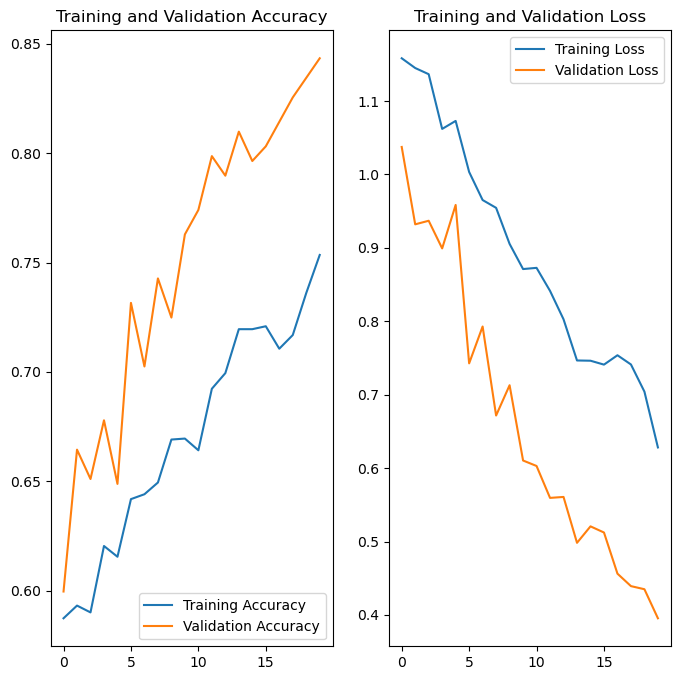

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [ ]:
## Which class has the least number of samples?
## Ans - conv2d_3 (Conv2D) 
## Which classes dominate the data in terms proportionate number of samples?
## Ans -  conv2d_5 (Conv2D)     

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [62]:
!pip install Augmentor

  Obtaining dependency information for Augmentor from https://files.pythonhosted.org/packages/f3/86/5a91176650eb229ea2cd95551c34c36fba6cd95da3bdc4a5c73fbb1536ca/Augmentor-0.2.12-py2.py3-none-any.whl.metadata


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [95]:
path_to_training_dataset = pathlib.Path("C:/Users/smita/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

# Loop through each class and apply augmentation
for class_name in class_names:
    # Create the full path for the class directory using pathlib
    class_path = path_to_training_dataset / class_name
    
    # Initialize the Augmentor pipeline for the class
    p = Augmentor.Pipeline(str(class_path))  # Convert path to string for Augmentor
    
    # Add rotation to the pipeline
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    # Generate 500 augmented samples for this class
    p.sample(500)  # Ensuring that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to C:\Users\smita\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x223B9508150>: 100%|█| 500/500 [00:08<00:


Initialised with 376 image(s) found.
Output directory set to C:\Users\smita\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x223B93C54D0>: 100%|█| 500/500 [00:08<00:00, 60.03 Samples/


Initialised with 95 image(s) found.
Output directory set to C:\Users\smita\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x223B9641AD0>: 100%|█| 500/500 [00:08<00:


Initialised with 438 image(s) found.
Output directory set to C:\Users\smita\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x223B96B39D0>: 100%|█| 500/500 [00:51<00


Initialised with 357 image(s) found.
Output directory set to C:\Users\smita\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2583x2096 at 0x223B940A150>: 100%|█| 500/500 [00:38<00:00, 12.89 Sample


Initialised with 462 image(s) found.
Output directory set to C:\Users\smita\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x223B9619410>: 100%|█| 500/500 [00:10<00:00, 46.25 Samples/


Initialised with 77 image(s) found.
Output directory set to C:\Users\smita\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x223B95AE790>: 100%|█| 500/500 [00:21<00:00, 23.32 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\smita\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x223B9321410>: 100%|█| 500/500 [00:09<00:00, 54.21 Samples/


Initialised with 139 image(s) found.
Output directory set to C:\Users\smita\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x223B9A01610>: 100%|█| 500/500 [00:09<00:00, 53.19 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [96]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [99]:
import glob

### Lets see the distribution of augmented data after adding new images to the original training data.

In [108]:
# Define the path to the training dataset
data_dir_train = pathlib.Path("C:/Users/smita/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

# Use glob to find all .jpg files inside the "output" directories of each class
path_list = glob.glob(os.path.join(str(data_dir_train), '*', 'output', '*.jpg'))

# Check the result
print(path_list)

['C:\\Users\\smita\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_560f28c9-ae76-4f02-9459-a6e1019251ea.jpg', 'C:\\Users\\smita\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_da7e5c2f-2bc5-4608-9ed1-9fd3d943fbe7.jpg', 'C:\\Users\\smita\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_eb0f9fd4-c8f4-44a3-89cb-ef0b411ed539.jpg', 'C:\\Users\\smita\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_0c48bf80-8507-40f6-99c4-c734f52592df.jpg', 'C:\\Users\\smita\\Downloads\\CNN_assignment\\Skin cancer ISIC The Internationa

In [109]:
# Correct usage of glob.glob to list files
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(str(data_dir_train), '*', 'output', '*.jpg'))]

# Print the result
print(lesion_list_new)

['actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic ker

In [111]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [127]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
##new_df = path_list.append(df2)

In [129]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [130]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [139]:
data_dir_train=pathlib.Path("C:/Users/smita/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")/df2
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

TypeError: Expected binary or unicode string, got                                                    Path  \
0     C:\Users\smita\Downloads\CNN_assignment\Skin c...   
1     C:\Users\smita\Downloads\CNN_assignment\Skin c...   
2     C:\Users\smita\Downloads\CNN_assignment\Skin c...   
3     C:\Users\smita\Downloads\CNN_assignment\Skin c...   
4     C:\Users\smita\Downloads\CNN_assignment\Skin c...   
...                                                 ...   
4495  C:\Users\smita\Downloads\CNN_assignment\Skin c...   
4496  C:\Users\smita\Downloads\CNN_assignment\Skin c...   
4497  C:\Users\smita\Downloads\CNN_assignment\Skin c...   
4498  C:\Users\smita\Downloads\CNN_assignment\Skin c...   
4499  C:\Users\smita\Downloads\CNN_assignment\Skin c...   

                                                  Label  
0     C:\Users\smita\Downloads\CNN_assignment\Skin c...  
1     C:\Users\smita\Downloads\CNN_assignment\Skin c...  
2     C:\Users\smita\Downloads\CNN_assignment\Skin c...  
3     C:\Users\smita\Downloads\CNN_assignment\Skin c...  
4     C:\Users\smita\Downloads\CNN_assignment\Skin c...  
...                                                 ...  
4495  C:\Users\smita\Downloads\CNN_assignment\Skin c...  
4496  C:\Users\smita\Downloads\CNN_assignment\Skin c...  
4497  C:\Users\smita\Downloads\CNN_assignment\Skin c...  
4498  C:\Users\smita\Downloads\CNN_assignment\Skin c...  
4499  C:\Users\smita\Downloads\CNN_assignment\Skin c...  

[4500 rows x 2 columns]

#### **Todo:** Create a validation dataset

In [140]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation" ,## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

TypeError: Expected binary or unicode string, got                                                    Path  \
0     C:\Users\smita\Downloads\CNN_assignment\Skin c...   
1     C:\Users\smita\Downloads\CNN_assignment\Skin c...   
2     C:\Users\smita\Downloads\CNN_assignment\Skin c...   
3     C:\Users\smita\Downloads\CNN_assignment\Skin c...   
4     C:\Users\smita\Downloads\CNN_assignment\Skin c...   
...                                                 ...   
4495  C:\Users\smita\Downloads\CNN_assignment\Skin c...   
4496  C:\Users\smita\Downloads\CNN_assignment\Skin c...   
4497  C:\Users\smita\Downloads\CNN_assignment\Skin c...   
4498  C:\Users\smita\Downloads\CNN_assignment\Skin c...   
4499  C:\Users\smita\Downloads\CNN_assignment\Skin c...   

                                                  Label  
0     C:\Users\smita\Downloads\CNN_assignment\Skin c...  
1     C:\Users\smita\Downloads\CNN_assignment\Skin c...  
2     C:\Users\smita\Downloads\CNN_assignment\Skin c...  
3     C:\Users\smita\Downloads\CNN_assignment\Skin c...  
4     C:\Users\smita\Downloads\CNN_assignment\Skin c...  
...                                                 ...  
4495  C:\Users\smita\Downloads\CNN_assignment\Skin c...  
4496  C:\Users\smita\Downloads\CNN_assignment\Skin c...  
4497  C:\Users\smita\Downloads\CNN_assignment\Skin c...  
4498  C:\Users\smita\Downloads\CNN_assignment\Skin c...  
4499  C:\Users\smita\Downloads\CNN_assignment\Skin c...  

[4500 rows x 2 columns]

#### **Todo:** Create your model (make sure to include normalization)

In [141]:
## your code goes here
# Re-create the CNN model (similar structure as before) with normalization and augmented data
model = Sequential([
    # Normalize pixel values
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

C:\Users\smita\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [142]:
## your code goes here
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

#### **Todo:**  Train your model

In [143]:
# Train the model for 30 epochs
epochs = 30
history = model.fit(
    train_ds,  # Using the balanced data
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 60s 755ms/step - accuracy: 0.2124 - loss: 2.2221 - val_accuracy: 0.4362 - val_loss: 1.7157
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 48s 687ms/step - accuracy: 0.3466 - loss: 1.8391 - val_accuracy: 0.4385 - val_loss: 1.5662
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 54s 765ms/step - accuracy: 0.4213 - loss: 1.5958 - val_accuracy: 0.4832 - val_loss: 1.5314
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 50s 715ms/step - accuracy: 0.4567 - loss: 1.5551 - val_accuracy: 0.5280 - val_loss: 1.3433
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 62s 894ms/step - accuracy: 0.4591 - loss: 1.5216 - val_accuracy: 0.5526 - val_loss: 1.3714
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.5111 - loss: 1.4193 - val_accuracy: 0.5503 - val_loss: 1.2371
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 49s 700ms/step - accuracy: 0.5001 - loss: 1.4284 - val_accuracy: 0.5459 - val_loss: 1.2483
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 60s 849ms/step - accuracy: 0.5392 - loss: 1.2845 - val_accurac

#### **Todo:**  Visualize the model results

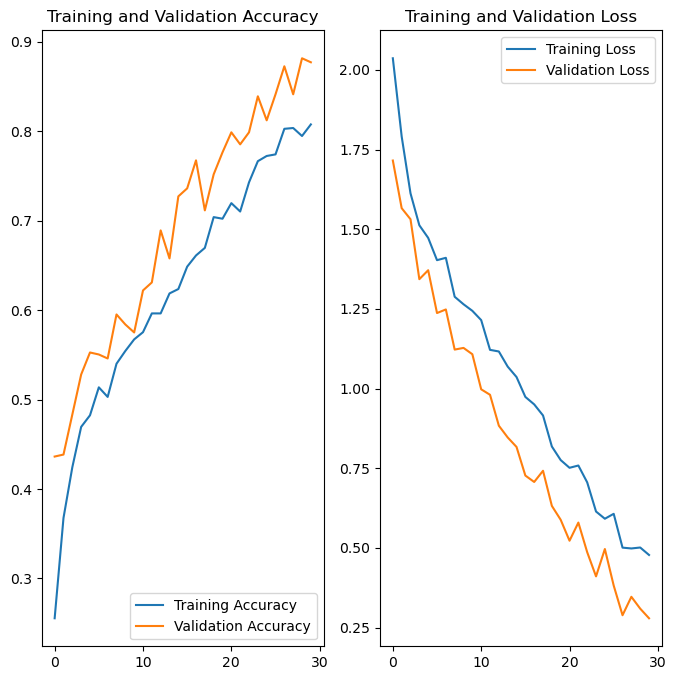

In [144]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

